I Work in Open source Data from Saudi Ministry of Justice for Jeddah city، I cleaned and arranged the data using Excel.

Available data for the 2018, 2019,2020,2021, each year has 3 column  price, area and deals. 

I did some general analysis then i select 5 district based on number of deals in 4 years, that’s Prince Fawaz, Al Amwaj,  Al Bawadi, Al-Bashaer and Obhur, and apply linear registration to predict price.


In [169]:
df = pd.read_excel('jeddah..xlsx')

df.head()

,month,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21,district
0,يناير,82474372.0,20949.04,26.0,76425053.0,18349.17,14.0,25681391.0,4839.19,8.0,58205357.0,10914.390,17.0,أبحر الجنوبية
1,فبراير,42753205.0,12862.65,13.0,59691746.0,18295.10,16.0,45600693.0,10788.22,17.0,134565318.0,37320.710,58.0,أبحر الجنوبية
2,مارس,17849786.0,6404.82,13.0,64456882.0,12533.05,22.0,9664666.0,3129.02,8.0,16453446.0,5175.949,10.0,أبحر الجنوبية
3,ابريل,27270240.0,7853.58,17.0,159589031.0,16565.64,41.0,600000.0,108.14,1.0,12790000.0,2403.600,6.0,أبحر الجنوبية
4,مايو,23740563.0,9818.15,13.0,90380344.0,13034.93,31.0,2400000.0,1000.00,1.0,0.0,0.000,0.0,أبحر الجنوبية


In [57]:
xx= []
for item in df.district.values:
    xx.append(get_display(arabic_reshaper.reshape(item)))

In [58]:
df['district2']=xx

In [59]:
# show shape
df.shape

(1571, 15)

In [60]:
# show types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      1571 non-null   object 
 1   price18    1544 non-null   float64
 2   area18     1544 non-null   float64
 3   deals18    1539 non-null   float64
 4   price19    1534 non-null   float64
 5   area19     1537 non-null   float64
 6   deals19    1537 non-null   float64
 7   price20    1534 non-null   float64
 8   area20     1532 non-null   float64
 9   deals20    1530 non-null   float64
 10  price21    1553 non-null   float64
 11  area21     1552 non-null   float64
 12  deals21    1551 non-null   float64
 13  district   1571 non-null   object 
 14  district2  1571 non-null   object 
dtypes: float64(12), object(3)
memory usage: 184.2+ KB


In [61]:
df.describe()

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
count,1.544000e+03,1.544000e+03,1539.000000,1.534000e+03,1.537000e+03,1537.000000,1.534000e+03,1532.000000,1530.000000,1.553000e+03,1552.000000,1551.000000
mean,1.242815e+07,1.115368e+04,11.708252,1.614921e+07,1.212012e+04,17.464541,1.685173e+07,13615.377621,17.669281,7.287067e+06,6007.681334,7.385558
std,4.975215e+07,9.691994e+04,20.950713,4.034748e+07,5.320613e+04,31.486091,4.491626e+07,34795.114520,33.402638,3.104802e+07,23784.716481,25.701505
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.500000e+05,1.843900e+02,1.000000,8.500000e+05,8.288300e+02,2.000000,9.452500e+05,826.717500,2.000000,0.000000e+00,0.000000,0.000000
50%,3.843750e+06,2.393110e+03,4.000000,5.580576e+06,3.709210e+03,6.000000,4.377908e+06,3332.350000,6.000000,0.000000e+00,0.000000,0.000000
75%,1.379384e+07,7.918686e+03,13.000000,1.913972e+07,1.200000e+04,19.000000,1.835741e+07,11651.162500,18.000000,1.700000e+06,1607.885000,3.000000
max,1.749939e+09,3.129290e+06,280.000000,1.000000e+09,1.892122e+06,406.000000,1.163332e+09,724442.470000,398.000000,9.941224e+08,349084.830000,437.000000


In [62]:
# check the Null values
df.isnull().sum()

month         0
price18      27
area18       27
deals18      32
price19      37
area19       34
deals19      34
price20      37
area20       39
deals20      41
price21      18
area21       19
deals21      20
district      0
district2     0
dtype: int64

In [63]:
# check the Null values
df.isna().sum()

month         0
price18      27
area18       27
deals18      32
price19      37
area19       34
deals19      34
price20      37
area20       39
deals20      41
price21      18
area21       19
deals21      20
district      0
district2     0
dtype: int64

In [64]:
# show most district duplicated in the dataset.
df['district'].value_counts()

الجامعيين              13
الامير فواز الجنوبى    13
أبحر الجنوبية          12
الفلاح                 12
المنار                 12
                       ..
مارس                    1
نوفمبر                  1
فبراير                  1
يناير                   1
ديسمبر                  1
Name: district, Length: 144, dtype: int64

In [65]:
df.fillna(0, inplace=True)

In [66]:
# check the Null values
df.isna().sum()

month        0
price18      0
area18       0
deals18      0
price19      0
area19       0
deals19      0
price20      0
area20       0
deals20      0
price21      0
area21       0
deals21      0
district     0
district2    0
dtype: int64

In [67]:
# Now, we have 127 district, it will be different after outliers removing
df['district'].unique()

array(['أبحر الجنوبية', 'أم حبلين', 'أم سدرة', 'ابحر الشمالية', 'يناير',
       'فبراير', 'مارس', 'ابريل', 'يونيو', 'يوليو', 'اوغسطس', 'سبتمبر',
       'اكتوبر', 'نوفمبر', 'ديسمبر', 'الأمير عبد المجيد', 'الاجاويد',
       'الاجواد', 'الاصالة', 'الامواج', 'الامير فواز الجنوبى',
       'الامير فواز بن عبدالعزيز', 'الاندلس', 'البحيرات', 'البساتين',
       'البشائر', 'البغدادية', 'البغدادية الشرقية', 'البغدادية الغربية',
       'البلد', 'البوادر', 'البوادى', 'البيان', 'الثعالبه', 'الثغر',
       'الجامعة', 'الجامعيين', 'الجزيرة', 'الجوهرة', 'الحمدانية',
       'الحمراء', 'الخالدية', 'الخليج', 'الخمرة', 'الدرة', 'الربوة',
       'الرحاب', 'الرحمانية', 'الرغامة', 'الروابى', 'الروضة', 'الرويس',
       'الرياض', 'الريان', 'الزمرد', 'الزهراء', 'الزهور', 'الساحل',
       'السامر', 'السبيل', 'السروات', 'السرور', 'السلامة', 'السليمانية',
       'السنابل', 'الشاطئ', 'الشراع', 'الشرفية', 'الشويضى', 'الصالحية',
       'الصحيفة', 'الصفا', 'الصفوة', 'الصوارى', 'العبير', 'العدل',
       'العزيزية', 'الع

# Some analysis on dataset in 2018,2019,2020,2021 years.

In [68]:
# let's see the price & size avarege per district

avg = df.groupby('district2').mean()

In [69]:
avg_per_district = pd.DataFrame.from_dict(avg)

In [70]:
avg_per_district['district2'] = avg_per_district.index


In [71]:
price_mean = df.groupby('district2').mean()
price_mean.head(10)

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district2,,,,,,,,,,,,
ﺀﺍﺮﻤﺤﻟﺍ,3.355743e+07,4285.395000,6.250000,4.316303e+07,5519.997917,5.583333,9.181786e+06,1760.566667,4.083333,2.434038e+07,1778.128333,2.083333
ﺀﺍﺮﻫﺰﻟﺍ,2.811448e+07,10437.369500,12.500000,4.064280e+07,8158.190750,12.583333,2.355656e+07,6392.071417,10.750000,1.330070e+07,2417.147500,3.500000
ﺀﺎﺒﻗ,7.509167e+05,527.127500,0.583333,1.400833e+06,1815.800000,1.583333,1.504125e+06,1097.127500,1.250000,2.250000e+05,193.424167,0.166667
ﺀﺎﺤﻴﻔﻟﺍ,9.154166e+06,1882.965833,3.666667,6.997329e+07,17846.553083,7.166667,1.396469e+07,3973.741083,5.833333,2.361127e+07,6546.709167,7.583333
ﺀﺎﻓﻮﻟﺍ,6.405915e+06,14437.691667,19.333333,1.639930e+07,30207.186667,40.000000,1.597489e+07,27686.703500,34.000000,1.051091e+07,13896.503333,20.083333
ﺆﻟﺆﻠﻟﺍ,1.111330e+07,6866.271333,15.416667,1.763529e+07,11077.148333,20.083333,2.526384e+07,13229.380833,26.750000,1.454215e+07,4667.631667,7.250000
ﺊﻃﺎﺸﻟﺍ,5.265979e+07,8275.270000,12.750000,8.913137e+07,11541.151667,22.333333,8.410486e+07,14350.758750,16.583333,1.403357e+07,2285.484833,3.250000
ﺍﺪﻬﻟﺍ,3.440128e+06,2405.185833,4.666667,6.176632e+06,4933.555833,8.250000,4.738668e+06,4058.570000,6.333333,1.581993e+06,1241.756667,2.083333
ﺎﻔﺼﻟﺍ,3.728071e+07,11927.879167,37.750000,6.347602e+07,21777.065283,76.166667,8.473821e+07,22200.973750,44.833333,2.253863e+07,6511.195383,17.083333


# 2018

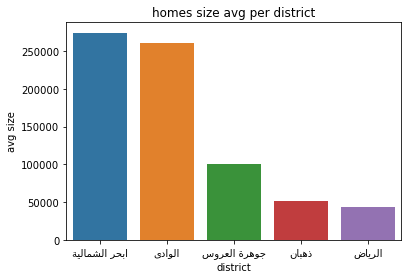

In [72]:
# size avarege per district



avg_per_district['district2'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='area18'), x='district2', y="area18")
plt.title('homes size avg per district')
plt.xlabel('district')
plt.ylabel('avg size')
plt.show()

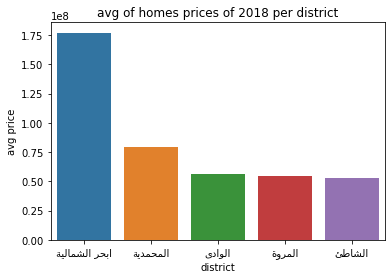

In [73]:
# price avarege per district
avg_per_district['district2'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='price18'), x="district2", y="price18")
plt.title('avg of homes prices of 2018 per district')
plt.xlabel('district')
plt.ylabel('avg price')
plt.show()

In [74]:
# Lowest price in 2018
df['price18'].min()

0.0

In [75]:
# Highest price in 2018
df['price18'].max()

1749939449.0

In [76]:
# Avg of all prices in 2018
df['price18'].mean()

12214554.037555696

In [77]:
# Lowest size in the dataset
df['area18'].min()

0.0

In [78]:
# Highest size in t2018
df['area18'].max()

3129290.41

In [79]:
# Avg of all size values in 2018
df['area18'].mean()

10961.987698408666

In [80]:
# Top 10 avg of prices per district in 2018

top_avg_price = df.groupby(['district']).mean().nlargest(n=5, columns=['price18'])
#.plot(kind='barh')

top_avg_price

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
ابحر الشمالية,1.770370e+08,274420.572250,20.000000,3.885426e+07,17038.273333,26.000000,4.656326e+07,31058.673083,30.750000,3.006561e+07,14050.325000,15.833333
المحمدية,7.971655e+07,30220.912292,11.666667,3.169236e+07,7271.102833,12.750000,4.238335e+07,6883.940000,10.416667,8.994889e+07,17771.134167,5.333333
الوادى,5.656945e+07,261395.941364,2.545455,6.065110e+06,10166.706364,3.727273,4.704285e+06,7334.190000,1.636364,1.242227e+06,1667.418182,0.181818
المروة,5.446707e+07,18952.651583,81.000000,5.616839e+07,17060.140333,82.333333,4.425807e+07,13441.510633,54.750000,1.189858e+07,4087.011750,17.833333
الشاطئ,5.265979e+07,8275.270000,12.750000,8.913137e+07,11541.151667,22.333333,8.410486e+07,14350.758750,16.583333,1.403357e+07,2285.484833,3.250000


In [81]:
# Bottom 10 avg of prices per district 2018

bottom_avg_price = df.groupby(['district']).mean().nsmallest(n=5, columns=['price18'])
#.plot(kind='barh')

bottom_avg_price

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
أم سدرة,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,2.317778e+05,1990.833333,2.222222,1.072222e+05,549.000000,0.666667
اكتوبر,0.0,0.0,0.0,1.100000e+06,495.500000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
البوادر,0.0,0.0,0.0,2.960000e+04,212.750000,0.300000,3.750000e+05,2717.450000,3.400000,4.135750e+05,2197.950000,3.000000
البيان,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,2.476250e+05,2218.087500,2.500000,4.287500e+05,2470.438750,2.750000
الجزيرة,0.0,0.0,0.0,1.244667e+06,6282.571667,9.166667,2.027627e+06,8315.269167,11.750000,2.018792e+06,5564.920833,7.916667


In [82]:
# Top 10 avg of size per district in 2018

top_avg_size = df.groupby(['district']).mean().nlargest(n=5, columns=['area18'])#.plot(kind='barh')

top_avg_size

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
ابحر الشمالية,1.770370e+08,274420.572250,20.000000,3.885426e+07,17038.273333,26.000000,4.656326e+07,31058.673083,30.750000,3.006561e+07,14050.325000,15.833333
الوادى,5.656945e+07,261395.941364,2.545455,6.065110e+06,10166.706364,3.727273,4.704285e+06,7334.190000,1.636364,1.242227e+06,1667.418182,0.181818
جوهرة العروس,1.838938e+07,100978.704583,121.833333,3.721405e+07,154824.068333,189.500000,5.244501e+07,157825.063333,194.416667,3.952962e+07,94129.300833,116.166667
ذهبان,2.937596e+06,51604.933500,4.916667,6.155837e+06,13298.606667,6.833333,9.724140e+06,27511.349167,7.500000,5.792241e+06,47424.525833,2.583333
الرياض,2.308777e+07,43671.053333,67.416667,7.044471e+07,218982.415833,97.833333,3.587789e+07,52805.530833,77.750000,2.345347e+07,28146.336250,41.666667


In [83]:
# Bottom 10 avg of size per district in 2018

bottom_avg_size = df.groupby(['district']).mean().nsmallest(n=5, columns=['area18'])
#.plot(kind='barh')
bottom_avg_size

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
أم سدرة,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,2.317778e+05,1990.833333,2.222222,1.072222e+05,549.000000,0.666667
اكتوبر,0.0,0.0,0.0,1.100000e+06,495.500000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
البوادر,0.0,0.0,0.0,2.960000e+04,212.750000,0.300000,3.750000e+05,2717.450000,3.400000,4.135750e+05,2197.950000,3.000000
البيان,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,2.476250e+05,2218.087500,2.500000,4.287500e+05,2470.438750,2.750000
الجزيرة,0.0,0.0,0.0,1.244667e+06,6282.571667,9.166667,2.027627e+06,8315.269167,11.750000,2.018792e+06,5564.920833,7.916667


# 2019

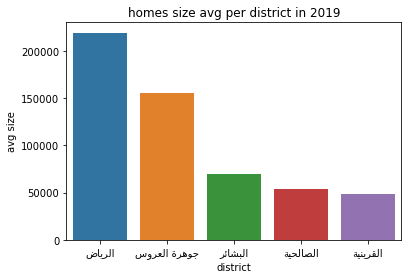

In [84]:
# size avarege per district


avg_per_district['district2'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='area19'), x="district2", y="area19")
plt.title('homes size avg per district in 2019')
plt.xlabel('district')
plt.ylabel('avg size')
plt.show()

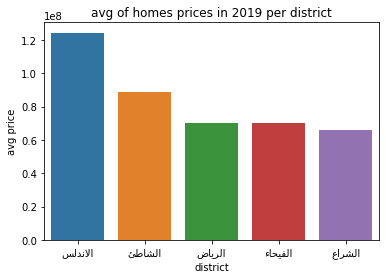

In [85]:
# price avarege per district
avg_per_district['district2'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='price19'), x="district2", y="price19")
plt.title('avg of homes prices in 2019 per district')
plt.xlabel('district')
plt.ylabel('avg price')
plt.show()

In [86]:
# Lowest price in 2019
df['price19'].min()

0.0

In [87]:
# Highest price in 2019
df['price19'].max()

1000000000.0

In [88]:
# Avg of all prices in 2019
df['price19'].mean()

15768863.129217058

In [89]:
# Lowest size in the dataset
df['area19'].min()

0.0

In [90]:
# Highest size in 2019
df['area19'].max()

1892122.16

In [91]:
# Avg of all size values in 2019
df['area19'].mean()

11857.812570655631

In [92]:
# Top 10 avg of prices per district in 2019

top_avg_price = df.groupby(['district']).mean().nlargest(n=5, columns=['price19'])
#.plot(kind='barh')

top_avg_price

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
الاندلس,2.325417e+07,2628.251667,2.166667,1.244169e+08,2492.666667,1.250000,1.050805e+07,1599.846667,1.000000,1.529645e+06,361.825417,0.666667
الشاطئ,5.265979e+07,8275.270000,12.750000,8.913137e+07,11541.151667,22.333333,8.410486e+07,14350.758750,16.583333,1.403357e+07,2285.484833,3.250000
الرياض,2.308777e+07,43671.053333,67.416667,7.044471e+07,218982.415833,97.833333,3.587789e+07,52805.530833,77.750000,2.345347e+07,28146.336250,41.666667
الفيحاء,9.154166e+06,1882.965833,3.666667,6.997329e+07,17846.553083,7.166667,1.396469e+07,3973.741083,5.833333,2.361127e+07,6546.709167,7.583333
الشراع,2.993935e+07,12136.126917,25.166667,6.612338e+07,38468.507650,63.250000,4.970508e+07,29080.450000,49.083333,1.757469e+07,7169.084167,13.083333


In [93]:
# Bottom 10 avg of prices per district 2019

bottom_avg_price = df.groupby(['district']).mean().nsmallest(n=5, columns=['price19'])
#.plot(kind='barh')

bottom_avg_price

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
أم سدرة,0.0,0.0,0.0,0.0,0.0,0.0,2.317778e+05,1990.833333,2.222222,1.072222e+05,549.000000,0.666667
ابريل,4050000.0,1023.0,2.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,1.200000e+06,300.000000,1.000000
البيان,0.0,0.0,0.0,0.0,0.0,0.0,2.476250e+05,2218.087500,2.500000,4.287500e+05,2470.438750,2.750000
المجد,0.0,0.0,0.0,0.0,0.0,0.0,2.583445e+06,25181.652727,27.818182,2.378811e+06,15993.288182,17.636364
اوغسطس,1181564.0,600.0,1.0,0.0,0.0,0.0,6.845170e+05,3096.190000,2.000000,0.000000e+00,0.000000,0.000000


In [94]:
# Top 10 avg of size per district in 2019

top_avg_size = df.groupby(['district']).mean().nlargest(n=5, columns=['area19'])#.plot(kind='barh')

top_avg_size

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
الرياض,2.308777e+07,43671.053333,67.416667,7.044471e+07,218982.415833,97.833333,3.587789e+07,52805.530833,77.750000,2.345347e+07,28146.336250,41.666667
جوهرة العروس,1.838938e+07,100978.704583,121.833333,3.721405e+07,154824.068333,189.500000,5.244501e+07,157825.063333,194.416667,3.952962e+07,94129.300833,116.166667
البشائر,6.849456e+06,25329.925000,37.083333,2.570526e+07,70040.113333,107.333333,1.886718e+07,51305.880833,79.500000,6.222660e+06,8072.390000,14.416667
الصالحية,3.462852e+07,33441.299167,54.000000,5.763981e+07,53348.867917,80.083333,5.137176e+07,43142.809167,55.166667,1.491765e+07,10793.782500,15.833333
القرينية,1.387396e+07,23640.643333,38.666667,3.372450e+07,48854.746667,80.500000,3.641856e+07,51218.867500,74.000000,1.598663e+07,19497.505000,30.083333


In [95]:
# Bottom 10 avg of size per district in 2019

bottom_avg_size = df.groupby(['district']).mean().nsmallest(n=5, columns=['area19'])
#.plot(kind='barh')
bottom_avg_size

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
أم سدرة,0.0,0.0,0.0,0.0,0.0,0.0,2.317778e+05,1990.833333,2.222222,1.072222e+05,549.000000,0.666667
ابريل,4050000.0,1023.0,2.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,1.200000e+06,300.000000,1.000000
البيان,0.0,0.0,0.0,0.0,0.0,0.0,2.476250e+05,2218.087500,2.500000,4.287500e+05,2470.438750,2.750000
المجد,0.0,0.0,0.0,0.0,0.0,0.0,2.583445e+06,25181.652727,27.818182,2.378811e+06,15993.288182,17.636364
اوغسطس,1181564.0,600.0,1.0,0.0,0.0,0.0,6.845170e+05,3096.190000,2.000000,0.000000e+00,0.000000,0.000000


# 2020

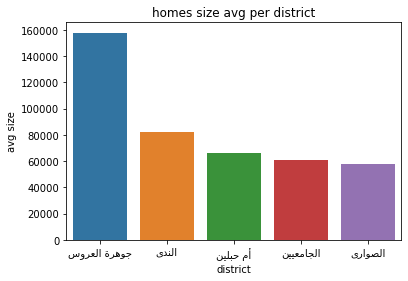

In [123]:
# size avarege per district
avg_per_district['district2'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='area20'), x="district2", y="area20")
plt.title('homes size avg per district')
plt.xlabel('district')
plt.ylabel('avg size')
plt.show()

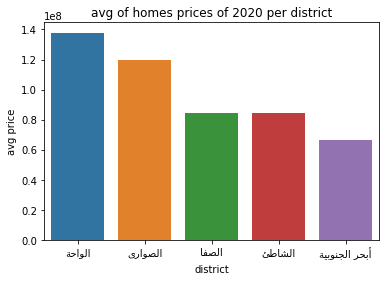

In [122]:
# price avarege per district
avg_per_district['district2'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='price20'), x="district2", y="price20")
plt.title('avg of homes prices of 2020 per district')
plt.xlabel('district')
plt.ylabel('avg price')
plt.show()

In [99]:
# Lowest price in 2020
df['price20'].min()

0.0

In [100]:
# Highest price in 2020
df['price20'].max()

1163332499.0

In [101]:
# Avg of all prices in 2020
df['price20'].mean()

16454842.019096117

In [102]:
# Lowest size in the dataset
df['area20'].min()

0.0

In [103]:
# Highest size in 2020
df['area20'].max()

724442.47

In [104]:
# Highest size in 2020
df['area20'].max()

724442.47

In [105]:
# Avg of all size values in 2020
df['area20'].mean()

13277.376521833236

In [106]:
# Top 10 avg of prices per district in 2021

top_avg_price = df.groupby(['district']).mean().nlargest(n=5, columns=['price20'])
#.plot(kind='barh')

top_avg_price

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
الواحة,1.634484e+07,6709.288083,34.916667,1.996420e+07,8725.644083,32.250000,1.377478e+08,37541.581325,61.666667,3.185003e+07,10191.604167,18.250000
الصوارى,1.337362e+07,11602.335000,21.916667,3.000595e+07,18780.910583,31.000000,1.199904e+08,58015.554750,77.916667,1.245675e+07,7201.635833,10.583333
الصفا,3.728071e+07,11927.879167,37.750000,6.347602e+07,21777.065283,76.166667,8.473821e+07,22200.973750,44.833333,2.253863e+07,6511.195383,17.083333
الشاطئ,5.265979e+07,8275.270000,12.750000,8.913137e+07,11541.151667,22.333333,8.410486e+07,14350.758750,16.583333,1.403357e+07,2285.484833,3.250000
أبحر الجنوبية,3.645318e+07,9674.172500,14.333333,6.519980e+07,13118.287358,22.500000,6.674761e+07,13307.164917,13.083333,1.850118e+07,4651.220750,7.583333


In [107]:
# Bottom 10 avg of prices per district 2021

bottom_avg_price = df.groupby(['district']).mean().nsmallest(n=5, columns=['price20'])
#.plot(kind='barh')

bottom_avg_price

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
ابريل,4050000.0,1023.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1200000.0,300.0,1.0
اكتوبر,0.0,0.0,0.0,1100000.0,495.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ديسمبر,1290700.0,600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
مارس,0.0,0.0,0.0,740000.0,669.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
يوليو,675000.0,600.0,1.0,1650000.0,600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# Top 10 avg of size per district in 2020

top_avg_size = df.groupby(['district']).mean().nlargest(n=5, columns=['area20'])#.plot(kind='barh')

top_avg_size

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
جوهرة العروس,1.838938e+07,100978.704583,121.833333,3.721405e+07,154824.068333,189.500000,5.244501e+07,157825.063333,194.416667,3.952962e+07,94129.300833,116.166667
الندى,0.000000e+00,0.000000,0.000000,3.815909e+04,585.792727,0.636364,1.277444e+07,82085.604545,90.363636,8.411383e+06,42537.386364,46.545455
أم حبلين,1.982229e+06,2801.566364,1.727273,1.746201e+06,7802.814545,0.909091,4.155644e+07,66155.198182,0.636364,1.773182e+06,1316.800000,2.000000
الجامعيين,2.339077e+06,14607.383077,12.461538,9.732335e+06,36748.526154,30.461538,2.152571e+07,61203.670769,51.076923,1.199949e+07,25319.613846,21.692308
الصوارى,1.337362e+07,11602.335000,21.916667,3.000595e+07,18780.910583,31.000000,1.199904e+08,58015.554750,77.916667,1.245675e+07,7201.635833,10.583333


In [109]:
# Bottom 10 avg of size per district in 2020

bottom_avg_size = df.groupby(['district']).mean().nsmallest(n=5, columns=['area20'])
#.plot(kind='barh')
bottom_avg_size

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
ابريل,4050000.0,1023.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1200000.0,300.0,1.0
اكتوبر,0.0,0.0,0.0,1100000.0,495.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ديسمبر,1290700.0,600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
مارس,0.0,0.0,0.0,740000.0,669.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
يوليو,675000.0,600.0,1.0,1650000.0,600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2021

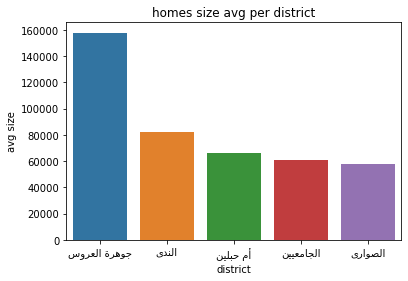

In [119]:
# size avarege per district
avg_per_district['district2'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='area20'), x="district2", y="area20")
plt.title('homes size avg per district')
plt.xlabel('district')
plt.ylabel('avg size')
plt.show()

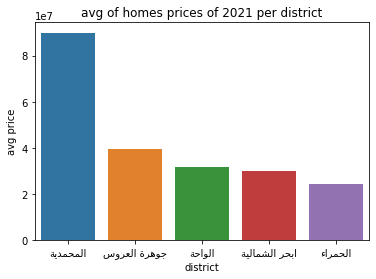

In [120]:
# price avarege per district
avg_per_district['district2'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='price21'), x="district2", y="price21")
plt.title('avg of homes prices of 2021 per district')
plt.xlabel('district')
plt.ylabel('avg price')
plt.show()

In [121]:
# Lowest price in 2021
df['price21'].min()

0.0

In [113]:
# Highest price in 2021
df['price21'].max()

994122397.0

In [114]:
# Avg of all prices in 2021
df['price21'].mean()

7203574.184595799

In [115]:
# Lowest size in the dataset
df['area21'].min()

0.0

In [116]:
# Highest size in 2021
df['area21'].max()

349084.83

In [117]:
# Avg of all size values in 2021
df['area21'].mean()

5935.0231897517515

In [118]:
# Top 10 avg of prices per district in 2021

top_avg_price = df.groupby(['district']).mean().nlargest(n=5, columns=['price21'])
#.plot(kind='barh')

top_avg_price

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
المحمدية,7.971655e+07,30220.912292,11.666667,3.169236e+07,7271.102833,12.750000,4.238335e+07,6883.940000,10.416667,8.994889e+07,17771.134167,5.333333
جوهرة العروس,1.838938e+07,100978.704583,121.833333,3.721405e+07,154824.068333,189.500000,5.244501e+07,157825.063333,194.416667,3.952962e+07,94129.300833,116.166667
الواحة,1.634484e+07,6709.288083,34.916667,1.996420e+07,8725.644083,32.250000,1.377478e+08,37541.581325,61.666667,3.185003e+07,10191.604167,18.250000
ابحر الشمالية,1.770370e+08,274420.572250,20.000000,3.885426e+07,17038.273333,26.000000,4.656326e+07,31058.673083,30.750000,3.006561e+07,14050.325000,15.833333
الحمراء,3.355743e+07,4285.395000,6.250000,4.316303e+07,5519.997917,5.583333,9.181786e+06,1760.566667,4.083333,2.434038e+07,1778.128333,2.083333


In [69]:
# Bottom 10 avg of prices per district 2021

bottom_avg_price = df.groupby(['district']).mean().nsmallest(n=5, columns=['price21'])
#.plot(kind='barh')

bottom_avg_price

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
اكتوبر,0.0,0.0,0.0,1100000.0,495.5,1.0,0.0,0.00,0.0,0.0,0.0,0.0
اوغسطس,1181564.0,600.0,1.0,0.0,0.0,0.0,684517.0,3096.19,2.0,0.0,0.0,0.0
ديسمبر,1290700.0,600.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
سبتمبر,0.0,0.0,0.0,0.0,0.0,0.0,350000.0,647.22,1.0,0.0,0.0,0.0
فبراير,0.0,0.0,0.0,0.0,0.0,0.0,600000.0,562.50,1.0,0.0,0.0,0.0


In [70]:
# Top 10 avg of size per district in 2021

top_avg_size = df.groupby(['district']).mean().nlargest(n=5, columns=['area21'])#.plot(kind='barh')

top_avg_size

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
جوهرة العروس,1.838938e+07,100978.704583,121.833333,3.721405e+07,154824.068333,189.500000,5.244501e+07,157825.063333,194.416667,3.952962e+07,94129.300833,116.166667
ذهبان,2.937596e+06,51604.933500,4.916667,6.155837e+06,13298.606667,6.833333,9.724140e+06,27511.349167,7.500000,5.792241e+06,47424.525833,2.583333
الندى,0.000000e+00,0.000000,0.000000,3.815909e+04,585.792727,0.636364,1.277444e+07,82085.604545,90.363636,8.411383e+06,42537.386364,46.545455
الخليج,5.191089e+06,16565.582500,17.083333,1.804032e+07,42348.578333,47.416667,2.462562e+07,49571.369167,54.666667,2.055617e+07,30968.980833,32.083333
الهجرة,1.174416e+06,16483.775833,18.000000,2.874371e+06,27775.361667,31.500000,3.754123e+06,30705.125000,34.750000,4.865250e+06,30002.625000,34.666667


In [71]:
# Bottom 10 avg of size per district in 2021

bottom_avg_size = df.groupby(['district']).mean().nsmallest(n=5, columns=['area21'])
#.plot(kind='barh')
bottom_avg_size

,price18,area18,deals18,price19,area19,deals19,price20,area20,deals20,price21,area21,deals21
district,,,,,,,,,,,,
اكتوبر,0.0,0.0,0.0,1100000.0,495.5,1.0,0.0,0.00,0.0,0.0,0.0,0.0
اوغسطس,1181564.0,600.0,1.0,0.0,0.0,0.0,684517.0,3096.19,2.0,0.0,0.0,0.0
ديسمبر,1290700.0,600.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
سبتمبر,0.0,0.0,0.0,0.0,0.0,0.0,350000.0,647.22,1.0,0.0,0.0,0.0
فبراير,0.0,0.0,0.0,0.0,0.0,0.0,600000.0,562.50,1.0,0.0,0.0,0.0


 # predicting the top 5  Districts have most deals.  

### 1. Prince Fawaz neighborhood

In [124]:
predict_F = pd.read_excel('predict_fw.xlsx')
#predict_F


In [125]:
price_F= predict_F['price ']
area_F= predict_F['area ']

In [126]:
x_F = np.array(area_F).reshape(-1,1)
y_F= np.array(price_F)


In [127]:
from sklearn.model_selection import train_test_split
Fx_train, Fx_test , Fy_train, Fy_test = train_test_split(x_F,y_F,test_size=1/3,random_state=0)

In [128]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
Fx_train = sc_x.fit_transform(Fx_train)
Fx_test = sc_x.fit_transform(Fx_test)

In [129]:
from sklearn.linear_model import LinearRegression 
regresssor = LinearRegression()
regresssor.fit(Fx_train , Fy_train)



LinearRegression()

In [130]:
# Predicting the the test set results

y_pred_F = regresssor.predict(Fx_test)

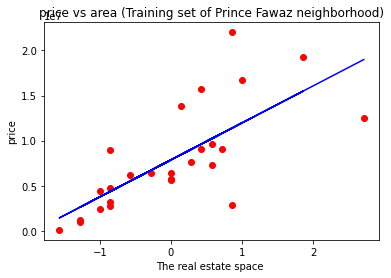

In [132]:
#visualising and training set 
plt.scatter(Fx_train , Fy_train , color = 'red')
plt.plot(Fx_train, regresssor.predict(Fx_train) , color = 'blue')
plt.title('price vs area (Training set of Prince Fawaz neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()




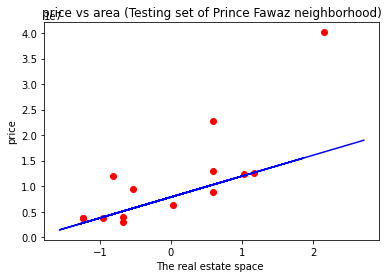

In [133]:
#visualising and test set 
plt.scatter(Fx_test , Fy_test , color = 'red')
plt.plot(Fx_train, regresssor.predict(Fx_train) , color = 'blue')
plt.title('price vs area (Testing set of Prince Fawaz neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()


 ### 2. Al Amwaj neighborhood

In [134]:
#حي الامواج  
predict_am = pd.read_excel('predict_am.xlsx')
#predict_am

In [135]:
price_am= predict_am['price ']
area_am= predict_am['area ']

In [136]:
am_x = np.array(area_am).reshape(-1,1)
am_y= np.array(price_am)

In [137]:
from sklearn.model_selection import train_test_split
amx_train, amx_test , amy_train, amy_test = train_test_split(am_x,am_y,test_size=1/3,random_state=0)

In [138]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
amx_train = sc_x.fit_transform(amx_train)
amx_test = sc_x.fit_transform(amx_test)

In [139]:
from sklearn.linear_model import LinearRegression 
regresssor = LinearRegression()
regresssor.fit(amx_train ,amy_train)

LinearRegression()

In [140]:
# Predicting the the test set results
y_pred_am = regresssor.predict(amx_test)

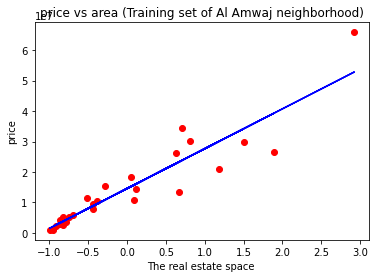

In [141]:
#visualising and training set 
plt.scatter(amx_train , amy_train , color = 'red')
plt.plot(amx_train, regresssor.predict(amx_train) , color = 'blue')
plt.title('price vs area (Training set of Al Amwaj neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()


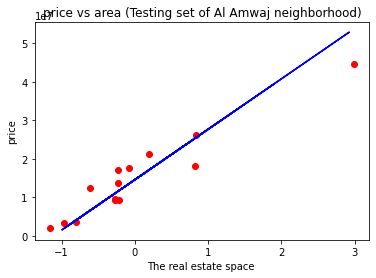

In [142]:

#visualising and test set 
plt.scatter(amx_test , amy_test , color = 'red')
plt.plot(amx_train, regresssor.predict(amx_train) , color = 'blue')
plt.title('price vs area (Testing set of Al Amwaj neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()



### 3. Al Bawadi  neighborhood

In [143]:
#حي البوادي 
predict_bawady = pd.read_excel('predict_bawady.xlsx')

#predict_bawady

In [144]:
price_bawady= predict_bawady['price ']
area_bawady= predict_bawady['area ']

In [145]:
bawady_x = np.array(area_bawady).reshape(-1,1)
bawady_y= np.array(price_bawady)



In [146]:
from sklearn.model_selection import train_test_split
bax_train, bax_test , bay_train, bay_test = train_test_split(bawady_x,bawady_y,test_size=1/3,random_state=0)

In [147]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
bax_train = sc_x.fit_transform(bax_train)
bax_test = sc_x.fit_transform(bax_test)

In [148]:
from sklearn.linear_model import LinearRegression 
regresssor = LinearRegression()
regresssor.fit(bax_train , bay_train)

LinearRegression()

In [149]:
# Predicting the the test set results
y_pred_ba = regresssor.predict(bax_test)

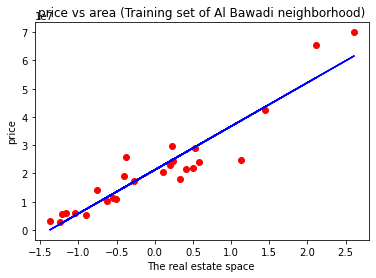

In [150]:
#visualising and training set 
plt.scatter(bax_train , bay_train , color = 'red')
plt.plot(bax_train, regresssor.predict(bax_train) , color = 'blue')
plt.title('price vs area (Training set of Al Bawadi neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()

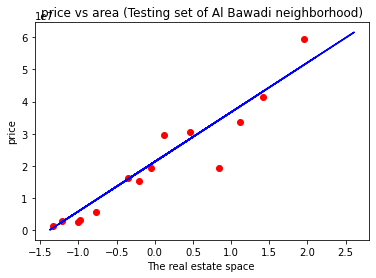

In [151]:
#visualising and test set 
plt.scatter(bax_test , bay_test , color = 'red')
plt.plot(bax_train, regresssor.predict(bax_train) , color = 'blue')
plt.title('price vs area (Testing set of Al Bawadi neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()



### 4. Al-Bashaer neighborhood

In [152]:
# حي البشائر 
predict_Bashaer = pd.read_excel('predict_baysh.xlsx')
#predict_baysh

In [153]:
price_Bashaer= predict_Bashaer['price ']
area_Bashaer= predict_Bashaer['area ']

In [154]:
Bashaer_x = np.array(area_Bashaer).reshape(-1,1)
Bashaer_y= np.array(price_Bashaer)

In [155]:
from sklearn.model_selection import train_test_split
shx_train, shx_test , shy_train, shy_test = train_test_split(Bashaer_x,Bashaer_y,test_size=1/3,random_state=0)

In [156]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
shx_train = sc_x.fit_transform(shx_train)
shx_test = sc_x.fit_transform(shx_test)

In [157]:
from sklearn.linear_model import LinearRegression 
regresssor = LinearRegression()
regresssor.fit(shx_train , shy_train)

LinearRegression()

In [158]:
# Predicting the the test set results
y_pred_sh = regresssor.predict(shx_test)

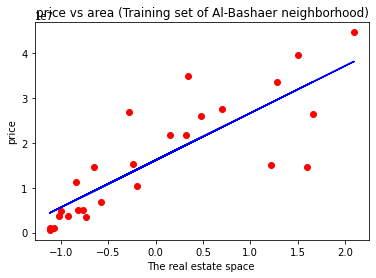

In [159]:
#visualising and training set 
plt.scatter(shx_train , shy_train , color = 'red')
plt.plot(shx_train, regresssor.predict(shx_train) , color = 'blue')
plt.title('price vs area (Training set of Al-Bashaer neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()

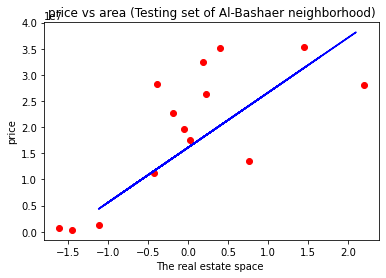

In [160]:
#visualising and test set 
plt.scatter(shx_test , shy_test , color = 'red')
plt.plot(shx_train, regresssor.predict(shx_train) , color = 'blue')
plt.title('price vs area (Testing set of Al-Bashaer neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()



### 5. Obhur neighborhood

In [161]:
#حي آبحر   
predict_ob = pd.read_excel('predict_ab.xlsx')
#predict_ab

In [162]:
price_ob= predict_ob['price ']
area_ob= predict_ob['area ']

In [163]:
x_ob = np.array(area_ob).reshape(-1,1)
y_ob= np.array(price_ob)

In [164]:
from sklearn.model_selection import train_test_split
obx_train, obx_test , oby_train, oby_test = train_test_split(x_ob,y_ob,test_size=1/3,random_state=0)

In [165]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
obx_train = sc_x.fit_transform(obx_train)
obx_test = sc_x.fit_transform(obx_test)

In [166]:
from sklearn.linear_model import LinearRegression 
regresssor = LinearRegression()
regresssor.fit(obx_train , oby_train)

LinearRegression()

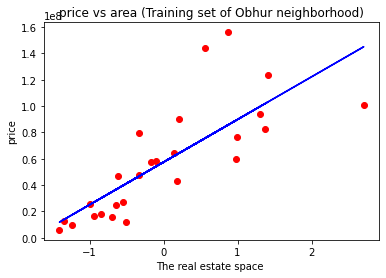

In [167]:
#visualising and training set 
plt.scatter(obx_train , oby_train , color = 'red')
plt.plot(obx_train, regresssor.predict(obx_train) , color = 'blue')
plt.title('price vs area (Training set of Obhur neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()

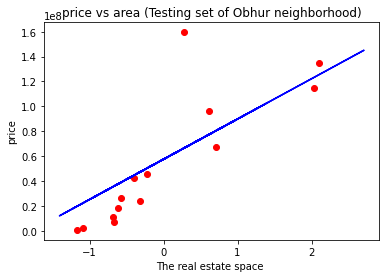

In [168]:
#visualising and test set 
plt.scatter(obx_test , oby_test , color = 'red')
plt.plot(obx_train, regresssor.predict(obx_train) , color = 'blue')
plt.title('price vs area (Testing set of Obhur neighborhood)')
plt.xlabel('The real estate space ')
plt.ylabel('price')
plt.show()

